In [8]:
pip install scikit-learn pandas matplotlib

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install tensorflow

In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image

In [11]:

data_dir_train = os.path.abspath("dataset/flower/train/")
data_dir_test = os.path.abspath("dataset/flower/val/")

classes = ["bellflower",
           "black_eyed_susan",
           "calendula",
           ]

img_size = (300, 300)

datatrain = []
datatest = []
labelstrain = []
labelstest = []

for class_label in classes:
    class_dir = os.path.join(data_dir_train, class_label)
    for img in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img)
        img_arr = image.load_img(img_path, target_size=img_size, grayscale=True)
        img_arr = image.img_to_array(img_arr)
        img_arr /= 255.0  # Normalize pixel values to be between 0 and 1
        datatrain.append(img_arr)
        labelstrain.append(classes.index(class_label))
        
    class_dir = os.path.join(data_dir_test, class_label)
    for img in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img)
        img_arr = image.load_img(img_path, target_size=img_size, grayscale=True)
        img_arr = image.img_to_array(img_arr)
        img_arr /= 255.0  # Normalize pixel values to be between 0 and 1
        datatest.append(img_arr)
        labelstest.append(classes.index(class_label))

datatrain = np.array(datatrain)
labelstrain = np.array(labelstrain)
labelstrain = to_categorical(labelstrain, num_classes=len(classes))

datatest = np.array(datatest)
labelstest = np.array(labelstest)
labelstest = to_categorical(labelstest, num_classes=len(classes))

# Split the data into training and testing sets
X_train= datatrain
X_test= datatest
y_train= labelstrain
y_test= labelstest

In [12]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_size[0], img_size[1], 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(classes), activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=16)

Epoch 1/10
121/180 [===================>..........] - ETA: 1:25 - loss: 1.1480 - accuracy: 0.3528

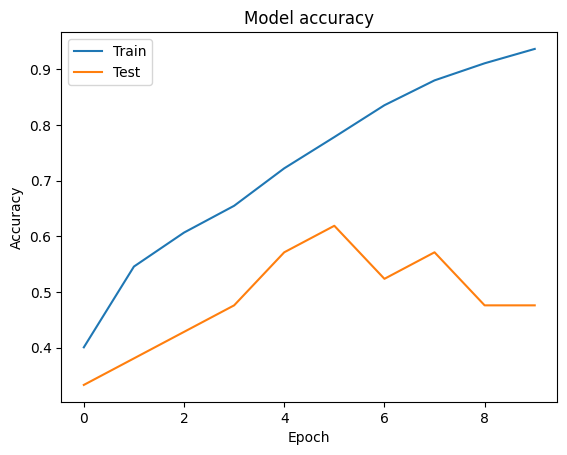

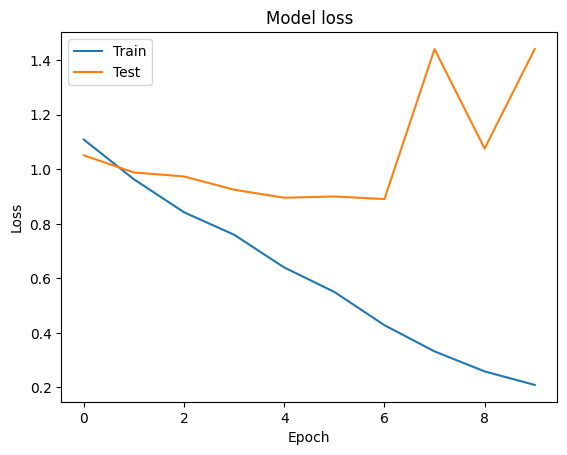

1/1 [==============================] - 0s 440ms/step
                  precision    recall  f1-score   support

      bellflower       0.50      0.29      0.36         7
black_eyed_susan       0.43      0.43      0.43         7
       calendula       0.50      0.71      0.59         7

        accuracy                           0.48        21
       macro avg       0.48      0.48      0.46        21
    weighted avg       0.48      0.48      0.46        21



In [5]:
# Plotting training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plotting training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Evaluate the model
predictions = model.predict(X_test)
y_pred_classes = np.argmax(predictions, axis=1)
y_true = np.argmax(y_test, axis=1)

print(classification_report(y_true, y_pred_classes, target_names=classes))